In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from apyori import apriori
import os
import sys
import xgboost as xgb
import matplotlib.pyplot as plt

/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
printing_mode = False

On importe le travail préalable

In [3]:
%run import_data

In [4]:
""""
path_import = '/Users/ppx/Desktop/M2 DS/projet_lolo_paulo/result/'
data_file = 'the_result_file.csv'

merged_data = pd.read_csv(path_import + data_file)
"""

'"\npath_import = \'/Users/ppx/Desktop/M2 DS/projet_lolo_paulo/result/\'\ndata_file = \'the_result_file.csv\'\n\nmerged_data = pd.read_csv(path_import + data_file)\n'

Les variables qui, d'un premier abord, semblent inutiles.

In [5]:
colonnes_inutiles = ['num_veh',
                                'Num_Acc',
                                'locp',
                                'actp',
                                'etatp',
                                'catv',
                                'hrmn',
                                'mois',
                                'jour',
                                'catvopp',
                                'occutc',
                                'place']

In [6]:
merged_data = merged_data.drop(colonnes_inutiles,axis = 1)
df = pd.get_dummies(merged_data, columns = merged_data.columns)
results = list(apriori(df))

In [7]:
y = merged_data.grav

In [8]:
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

In [9]:
merged_data.columns

Index(['catu', 'grav', 'sexe', 'secu', 'an_nais', 'senc', 'obs', 'obsm',
       'choc', 'manv', 'lum', 'agg', 'int', 'atm', 'col', 'mom', 'catv_gen',
       'catvopp_gen'],
      dtype='object')

In [10]:
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(merged_data)
#merged_data = pd.DataFrame(np_scaled)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.2, random_state=42)

In [12]:
clf = MLPClassifier(solver='adam', alpha=0.0001,hidden_layer_sizes=(112,46), random_state=42)

In [13]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(112, 46), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
resultat = clf.predict(X_test)

In [15]:
param = clf.get_params()
print(param)

proba = clf.predict_proba(X_test)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (112, 46), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [16]:
X_test.shape
#X_train.shape

(6484, 17)

In [17]:
resultat
set(resultat)
len(resultat)

len(y_test)

6484

In [18]:
pourcentage = (resultat - y_test).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print(1 + sum(pourcentage)/len(pourcentage))

0.365206662554


In [19]:
df = pd.get_dummies(merged_data, columns = merged_data.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(merged_data, y, test_size=0.2, random_state=42)

Exemple d'utilisation d'apriori

In [21]:
listing_apriori_bis = []
data_accident = merged_data[merged_data.grav == 4].drop('grav', axis = 1)



for indexe in data_accident.index:
    event = []
    for colonne in data_accident.columns:
        if not (data_accident[colonne][indexe] == 0):
            event.append(colonne + str(data_accident[colonne][indexe]))
    listing_apriori_bis.append(event)

len(listing_apriori_bis)


merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)
min_sup = 0.40
min_conf = 0.90
results = list(apriori(listing_apriori_bis, min_support = min_sup, min_confidence = min_conf))

print(len(results))

os.system('say "fini"')

9


0

In [22]:
#


In [23]:
if printing_mode:
    for x in range(0,len(results)):
        print(results[x].items)
        print('support')
        print(results[x].support)
        print('confiance')
        print(results[x].ordered_statistics[0].confidence)


In [24]:
len(data_accident.columns)

17

In [25]:
data_accident.columns

Index(['catu', 'sexe', 'secu', 'an_nais', 'senc', 'obs', 'obsm', 'choc',
       'manv', 'lum', 'agg', 'int', 'atm', 'col', 'mom', 'catv_gen',
       'catvopp_gen'],
      dtype='object')

In [26]:
listing_apriori_bis

[['catu2',
  'sexe1',
  'secu23.0',
  'an_nais1999.0',
  'choc1.0',
  'manv1.0',
  'lum2',
  'agg2',
  'int1',
  'atm7',
  'col3',
  'mom4',
  'catv_gen1',
  'catvopp_gen2'],
 ['catu2',
  'sexe1',
  'secu21.0',
  'an_nais2001.0',
  'senc1.0',
  'choc3.0',
  'manv15.0',
  'lum1',
  'agg2',
  'int1',
  'atm7',
  'col2',
  'mom1',
  'catv_gen1',
  'catvopp_gen2'],
 ['catu1',
  'sexe1',
  'secu21.0',
  'an_nais1994.0',
  'obsm2.0',
  'choc2.0',
  'manv1.0',
  'lum1',
  'agg1',
  'int1',
  'atm1',
  'col5',
  'mom1',
  'catv_gen1',
  'catvopp_gen2'],
 ['catu2',
  'sexe2',
  'secu11.0',
  'an_nais1994.0',
  'obs16.0',
  'obsm2.0',
  'choc3.0',
  'manv15.0',
  'lum1',
  'agg1',
  'int1',
  'atm1',
  'col5',
  'mom4',
  'catv_gen2',
  'catvopp_gen1'],
 ['catu2',
  'sexe2',
  'secu11.0',
  'an_nais2014.0',
  'obs16.0',
  'obsm2.0',
  'choc3.0',
  'manv15.0',
  'lum1',
  'agg1',
  'int1',
  'atm1',
  'col5',
  'mom4',
  'catv_gen2',
  'catvopp_gen1'],
 ['catu1',
  'sexe2',
  'secu21.0',
  'an_na

In [27]:
def ploting_data(df, granularity = 50, print_mode = printing_mode, start_plot = 100):
    
    maxi_w = max(df)
    mini_w = min(df) + start_plot

    bins_w = np.linspace(mini_w, maxi_w, granularity)

    if print_mode:
        plt.hist(df,bins_w)
        plt.title(df.name )
        plt.show()
        plt.close()

In [28]:
merged_data['grav'].head(5)


0    1
1    3
2    3
3    3
4    3
Name: grav, dtype: int64

In [29]:
max_depth=10
learning_rate=0.01
n_estimators=100
silent=True
objective='binary:logistic'
booster='gblinear'
n_jobs=100
nthread=None
gamma=0.1
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
reg_alpha=0.5
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0
seed=None
missing=None



In [30]:
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)


train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)

predictions = gbm.predict(test_X)


In [31]:
pourcentage = (predictions - y_test).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print(1 + sum(pourcentage)/len(pourcentage))

0.600863664405


Ici on essaie juste de prédire grave / pas grave

In [32]:
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.25)

cat1 = [1]
cat2 = [2,3,4]

y_train = y_train.replace(cat1,0)
y_train = y_train.replace(cat2,1)
y_test = y_test.replace(cat1,0)
y_test = y_test.replace(cat2,1)

train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)
predictions = gbm.predict(test_X)

pourcentage = (predictions - y_test).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print(1 + sum(pourcentage)/len(pourcentage))

0.819617520049


In [33]:
print(X_train.shape,
X_test.shape, y_train.shape, y_test.shape
     )

(24312, 17) (8105, 17) (24312,) (8105,)


1818 4825 1040 422


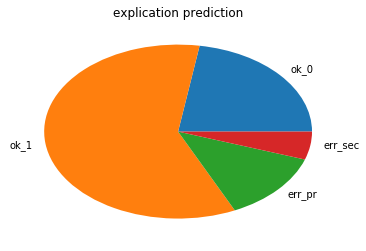

In [34]:
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

In [35]:
y_sexe = merged_data.sexe
merged_data_sans_sexe = merged_data.drop(['sexe'],axis = 1)


X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)

cat1 = [1,3,4]
cat2 = [2]

y_train = y_train.replace(cat1,0)
y_train = y_train.replace(cat2,1)
y_test = y_test.replace(cat1,0)
y_test = y_test.replace(cat2,1)

train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)
predictions = gbm.predict_proba(test_X)



In [36]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count

def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count

def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count

def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count



In [39]:
class ROC_curves:
    def __init__(self, pred = predictions, res = y_test, gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()
    


In [40]:
ROC = ROC_curves()

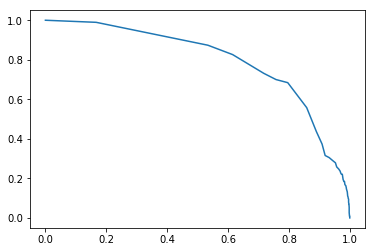

In [41]:
ROC.plot_it()

In [ ]:
y

In [44]:
sum(y_train)/len(y_train)

0.060497000856898027